In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.io import wavfile
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D

In [2]:
rate, data = wavfile.read('audio.wav')
data = data.sum(axis = 1)/2
time = np.linspace(0, len(data) / rate, num=len(data))

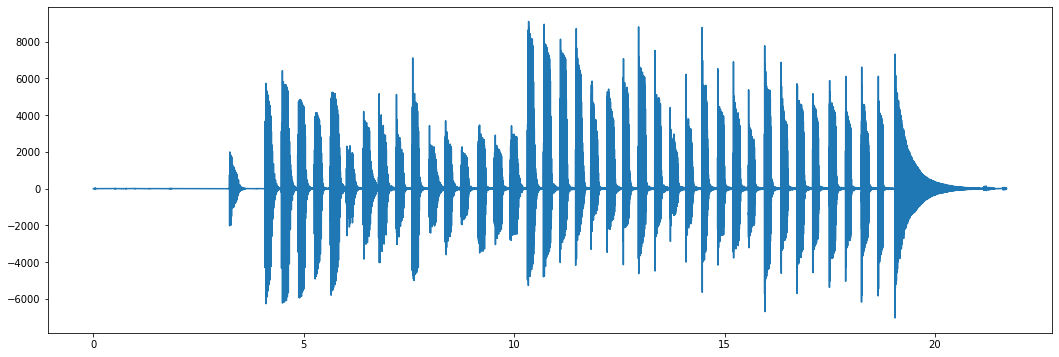

In [3]:
plt.figure(figsize=(18, 6))
plt.plot(time, data)
plt.show()

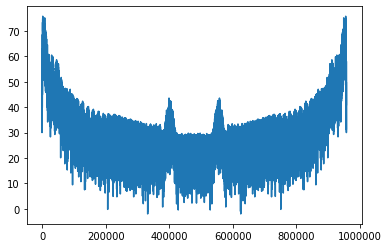

In [4]:
signalFFT = fft(data)
signalPSD = np.abs(signalFFT)
plt.plot(10*np.log10(signalPSD))
plt.show()

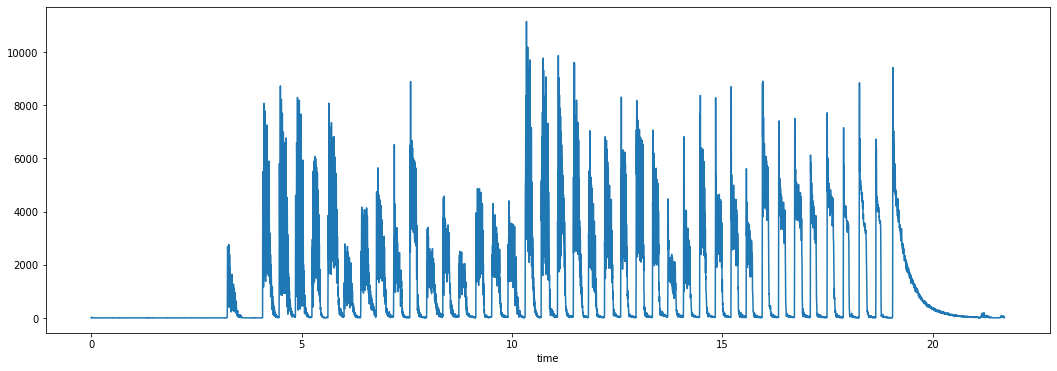

In [6]:
plt.figure(figsize=(18, 6))
sample, time_seg, zxx = stft(data, fs=rate)
zxx = np.abs(zxx)
plt.plot(time_seg, zxx.sum(axis=0))
plt.xlabel("time")
plt.show()

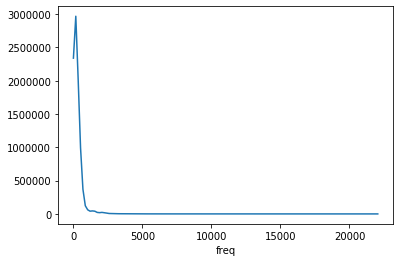

In [7]:
plt.plot(sample, zxx.sum(axis=1))
plt.xlabel("freq")
plt.show()

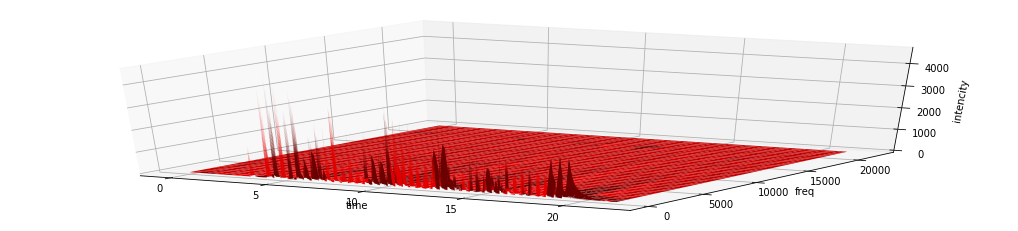

In [9]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, projection='3d')

Vtime_seg, Vsample = np.meshgrid(time_seg, sample)
ax.plot_surface(Vtime_seg, Vsample, zxx, color='red')
ax.set_xlabel('time')
ax.set_ylabel('freq')
ax.set_zlabel('intencity')
plt.show()